<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/03_IBM_Marketing_Customer_Value_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on

In [3]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

#import fastcluster
#import hdbscan
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist

Context: 

Using Watson Analytics, you can predict behavior to retain your customers. You can analyze all relevant customer data and develop focused customer retention programs.

Inspiration: 

Understand customer demographics and buying behavior. Use predictive analytics to analyze the most profitable customers and how they interact. Take targeted actions to increase profitable customer response, retention, and growth

## Load Data

In [ ]:
#file='/content/drive/My Drive/Data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'
file='https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'
df = pd.read_csv(file)
print(df.shape)
df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


## Data analsyis

- Engagement Rate

In [ ]:
 df.groupby('Engaged').count()['Response'] 

Engaged
0    7826
1    1308
Name: Response, dtype: int64

In [ ]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0
)
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [ ]:
df['Engaged'].value_counts(normalize=True)

0    0.856799
1    0.143201
Name: Engaged, dtype: float64

In [ ]:
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


As you can see, about 14% of the customers have responded to marketing calls, and the
remaining 86% of the customers have not responded.

- By Renew Offer Type

In [ ]:
engagement_by_offer_type_df = pd.pivot_table(
    df, values='Response', index='Renew Offer Type', columns='Engaged', aggfunc=len
).fillna(0.0)
engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']
engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


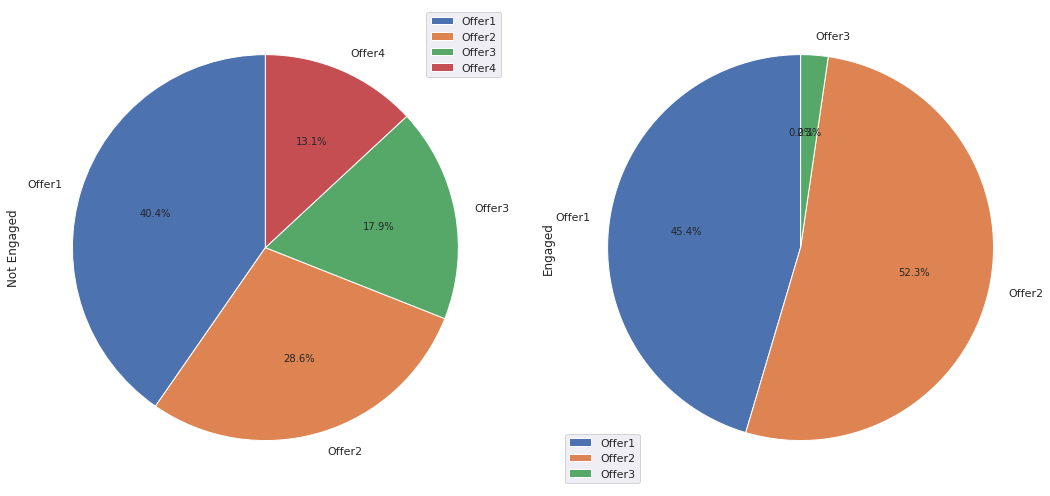

In [ ]:
engagement_by_offer_type_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)
plt.tight_layout()
plt.show()


- By Sales Channel

In [ ]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


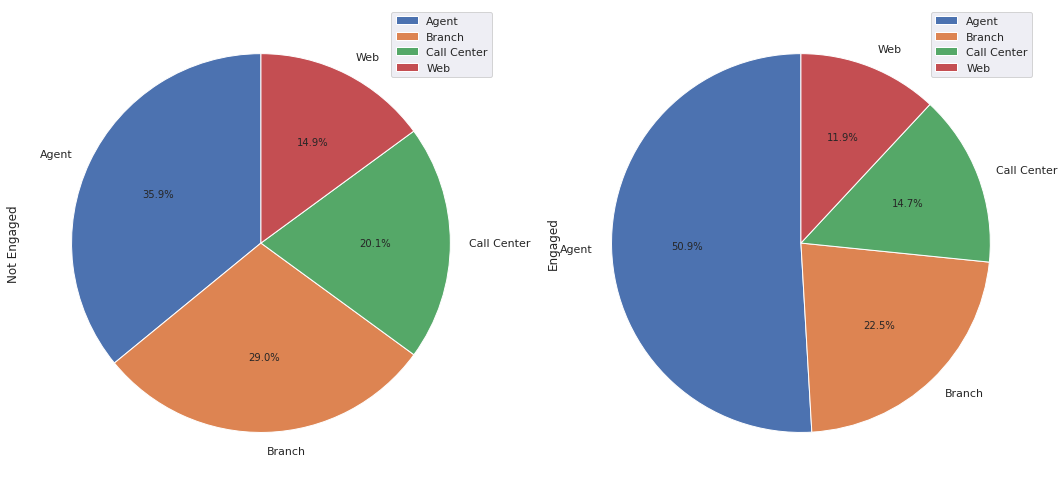

In [ ]:

engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)
plt.tight_layout()
plt.show()

Compared to the previous table that shows raw counts of engaged and non-engaged
customers in each sales channel, these pie charts help us to visually spot the differences in
the distributions more easily. As you can see from these charts, more than half of the
engaged customers were from agents, whereas non-engaged customers are more evenly
distributed across all four different channels. As you can see from these charts, analyzing
and visualizing data can help us to notice interesting patterns in the data, which will
further help when we run regression analysis in the later parts of this chapter.

- Total Claim Amount Distributions

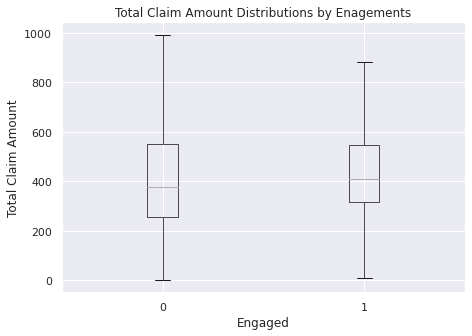

In [ ]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

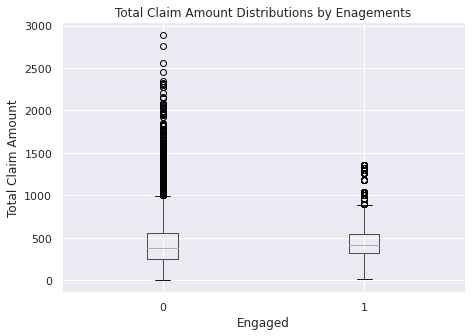

In [ ]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

As you notice in these box plots, they plot many dots above the upper boundary lines,
which suggested maximum values in the previous box plots. The dots above the upper
boundary line show the suspected outliers that are decided based on the Interquartile
range (IQR). The IQR is simply the range between the first and third quartiles, and the
points that fall 1.5*IQR above the third quartile or 1.5*IQR below the first quartile are
suspected outliers and are shown with the dots

- Income Distributions

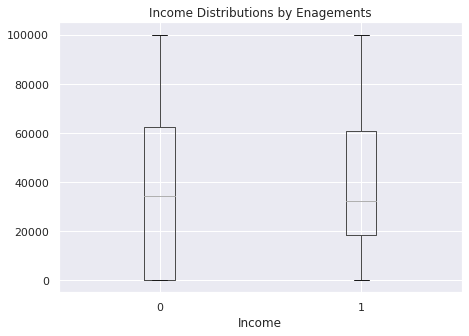

In [ ]:
ax = df[['Engaged', 'Income']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_xlabel('Income')
ax.set_title('Income Distributions by Enagements')

plt.suptitle("")
plt.show()

In [ ]:
df.groupby('Engaged').describe().T

Engaged                                  0            1
Customer Lifetime Value count  7826.000000  1308.000000
                        mean   8030.022305  7854.871361
                        std    6968.569280  6255.638229
                        min    1898.007675  2004.350666
                        25%    4015.355255  3933.813993
...                                    ...          ...
Total Claim Amount      min       0.099007     7.345946
                        25%     253.236319   316.800000
                        50%     377.083630   410.120119
                        75%     550.092193   547.200000
                        max    2893.239678  1358.400000

[64 rows x 2 columns]

In [ ]:
df.groupby('Engaged').describe()['Income'].T

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


## Regression Analysis with Continuous Variables Only

So far, we have analyzed the types of fields that we have in the data and how the patterns
differ between the engaged group and the non-engaged group. Now, we are going to
discuss how to conduct and interpret regression analysis in Python by using
the statsmodels package. We will first build a logistic regression model with continuous
variables, and you'll learn how to interpret the results. Then, we are going to discuss
different ways to handle categorical variables when fitting regression models, and what
impact those categorical variables have on the fitted logistic regression model.

In [ ]:
import statsmodels.api as sm

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [ ]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]

With the statsmodels package imported, the code to initiate a logistic regression model is
quite simple, and looks as follows:

In [ ]:
logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
)

In [ ]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                -0.02546
Time:                        05:55:21   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant

Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

In [ ]:
df.corr()['Engaged'].sort_values(ascending=False)

Engaged                          1.000000
Total Claim Amount               0.016877
Income                           0.011932
Monthly Premium Auto             0.010966
Months Since Policy Inception    0.002952
Customer Lifetime Value         -0.008930
Number of Open Complaints       -0.009881
Months Since Last Claim         -0.016597
Number of Policies              -0.020891
Name: Engaged, dtype: float64

Let's take a closer look at this model output. coef represents the coefficients for each of the
input variables, and z represents the z-score, which is the number of standard deviations
from the mean. The P>|z| column represents the p-value, which means how likely it is to
observe the relationship between the feature and the output variable by chance. So, the
lower the value of P>|z| is, the more likely it is that the relationship between the given
feature and the output variable is strong and is not by chance. Typically, 0.05 is a good
cut-off point for the p-value, and any value less than 0.05 signifies a strong relationship
between the given feature and the output variable.

Looking at this model output, we can see that Income, Monthly Premium Auto, Months
Since Last Claim, Months Since Policy Inception, and Number of
Policies variables have significant relationships with the output variable, Engaged. For
example, Number of Policies variable is significant and is negatively correlated with
Engaged. This suggests that the more policies that the customers have, the less likely they
are to respond to marketing calls. As another example, the Months Since Last Claim
variable is significant and is negatively correlated with the output variable, Engaged. This
means that the longer it has been since the last claim, the less likely that the customer is
going to respond to marketing calls.

## Regression Analysis with Categorical Variables

In [ ]:
le = LabelEncoder()
df['Education']=le.fit_transform(df['Education'])

In [ ]:
df['Education'].value_counts()

0    2748
1    2681
3    2622
4     741
2     342
Name: Education, dtype: int64

In [ ]:
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'Bachelor': 0,
 'College': 1,
 'Doctor': 2,
 'High School or Below': 3,
 'Master': 4}

In [ ]:
df['Gender']=le.fit_transform(df['Gender'])
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'F': 0, 'M': 1}

In [ ]:
logit = sm.Logit(
    df['Engaged'], 
    df[[
        'Gender',
        'Education'
    ]]
)

In [ ]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.490321
         Iterations 6


In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                 -0.1938
Time:                        06:37:46   Log-Likelihood:                -4478.6
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -1.1449      0.046    -24.729      0.000      -1.236      -1.054
Education     -0.5112      0.017    -30.289      0.000      -0.544      -0.478
==============================================================================
"""

As you can see in this output and by looking at the p-values in the P>|z| column, both
the GenderFactorized and EducationFactorized variables seem to have significant
relationships with the output variable Engaged. If we look at the coefficients of these two
variables, we can see that both are negatively correlated with the output. This suggests that
male customers, encoded with 1 in the GenderFactorized variable, are less likely to be
engaged with marketing calls, as compared to female customers, encoded with 0 in
the GenderFactorized variable. Similarly, the higher the customers' education levels are,
the less likely that they will be engaged with marketing calls.

## Combining continuous and categorical variables

In [ ]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'Gender',
        'Education'
    ]]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420231
         Iterations 6


In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                -0.02313
Time:                        06:45:59   Log-Likelihood:                -3838.4
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.587e-06   5.02e-06     -1.311      0.190   -1.64e-05    3.26e-06
Income                        -2.289e-06   1.04e-06     -2.201      0.028   -4.33e-06    -2.5e-07
Monthly Premium Auto             -0.0077      0.001     -6.345      0.000      -0.010      -0.005
Months Since Last Claim          -0.0187      0.003     -6.655      0.000      -0.024      -0.013
Months Since Policy Inception    -0.0054      0.001     -5.560      0.000      -0.007      -0.004
Number of Open Complaints        -0.0814      0.034     -2.384      0.017      -0.148      -0.014
Number of Policies               -0.0756      0.013     -5.933      0.000      -0.101      -0.051
Total Claim Amount                0.0002      0.000      1.090      0.276      -0.000       0.000
Gender                           -0.1440      0.058     -2.491      0.013      -0.257      -0.031
Education                        -0.0680      0.021     -3.246      0.001      -0.109      -0.027
=================================================================================================
"""

Let's take a closer look at this output. The Income, Monthly Premium Auto, Months
Since Last Claim, Months Since Policy Inception, Number of Open
Complaints, Number of Policies, and GenderFactorized variable are significant at
a 0.05 significance level, and all of them have negative relationships with the output
variable, Engaged. Hence, the higher the income is, the less likely that the customer will be
engaged with marketing calls. Similarly, the more policies that the customer has, the less
likely that he or she will be engaged with marketing calls.

Lastly, male customers are less likely to engage with marketing calls than female
customers, which we can see from looking at the coefficient of GenderFactorized. From
looking at this regression analysis output, we can easily see the relationships between the
input and output variables, and we can understand which attributes of customers are
positively or negatively related to customer engagement with marketing calls.

# Kaggle

https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-data-analysis-prediction

In [46]:
#file='/content/drive/My Drive/Data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'
file='https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'
df = pd.read_csv(file)
print(df.shape)
df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [47]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [29]:
df.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [30]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

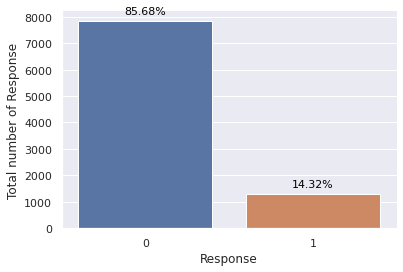

In [31]:
ax = sns.countplot('Response',data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Notice that about 14% customers have responded to marketing calls, and the remaining 86% of the customers have not responded.

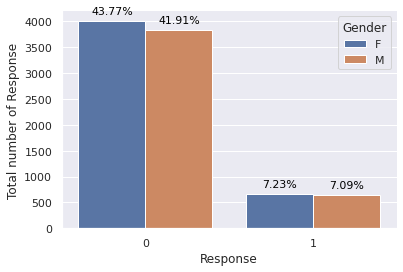

In [32]:
ax = sns.countplot('Response',hue = 'Gender' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Phuong pháp này sai vì khi số lượng người nữ khảo sát lớn hơn người nam thì tỉ lệ đồng thuận của nữ cũng cao hơn nam. Chúng ta phải so sánh tỉ lệ đồng thuận của nữ trên số lượng nữ khảo sát và tương tự với nam theo cách dưới đây:

Method 2

In [53]:
# Engaged
a=pd.pivot_table(df,values='Engaged',index='Response',columns='Gender',
               aggfunc='count',margins=True,margins_name = 'Sub-total')
a

Gender,F,M,Sub-total
Response,,,
No,3998,3828,7826
Yes,660,648,1308
Sub-total,4658,4476,9134


In [57]:
df.groupby(by='Gender')['Response'].count()

Gender
F    4658
M    4476
Name: Response, dtype: int64

In [59]:
b=a.div(df.groupby(by='Gender')['Response'].count(), axis=1 )
b

Gender,F,M,Sub-total
Response,,,
No,0.858308,0.855228,NaN
Yes,0.141692,0.144772,NaN
Sub-total,1.000000,1.000000,NaN


In [126]:
b[:-1]

Gender,F,M,Sub-total
Response,,,
No,0.858308,0.855228,NaN
Yes,0.141692,0.144772,NaN


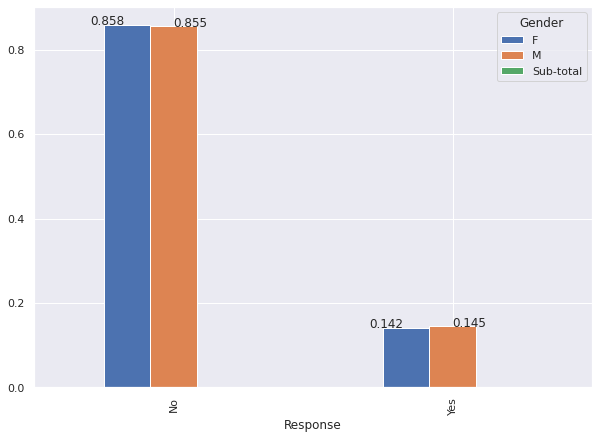

In [127]:
b=b[:-1]
ax = b.plot(kind='bar',figsize=(10,7))
i=0
for index, row in b.iterrows():
  ax.text(i-0.3,row.F,round(row.F,3))
  ax.text(i,row.M,round(row.M,3))
  i+=1

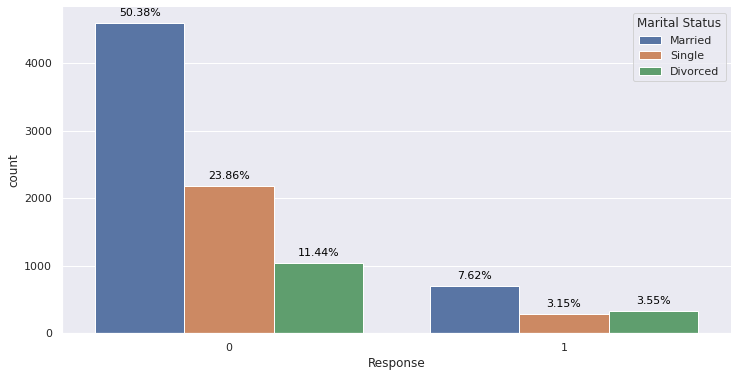

In [33]:
plt.figure(figsize=(12,6))
ax = sns.countplot('Response', hue = df['Marital Status'], data = df)
annot_plot(ax,0.08,1)
plt.show()

In [120]:
# Engaged
a=pd.pivot_table(df,values='Engaged',index='Response',columns='Marital Status',
               aggfunc='count',margins=True,margins_name = 'Sub-total')
a

Marital Status,Divorced,Married,Single,Sub-total
Response,,,,
No,1045,4602,2179,7826
Yes,324,696,288,1308
Sub-total,1369,5298,2467,9134


In [227]:
b=a.div(df.groupby(by='Marital Status')['Response'].count(), axis=1 )
b

Marital Status,Divorced,Married,Single,Sub-total
Response,,,,
No,0.763331,0.86863,0.883259,NaN
Yes,0.236669,0.13137,0.116741,NaN
Sub-total,1.000000,1.00000,1.000000,NaN


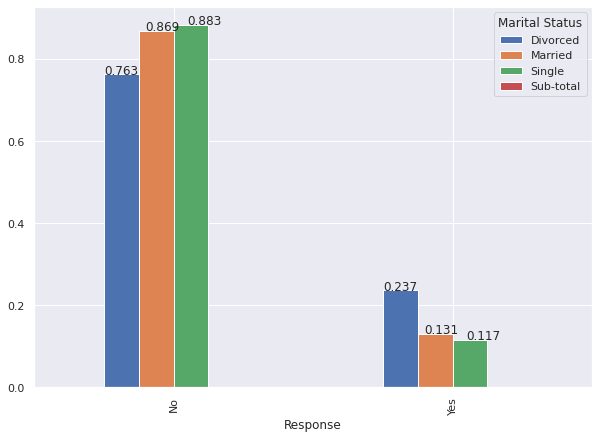

In [228]:
b=b[:-1]
ax =b.plot(kind='bar',figsize=(10,7))
i=0
for index, row in b.iterrows():
  ax.text(i-0.25,row.Divorced,round(row.Divorced,3))
  ax.text(i-0.1,row.Married,round(row.Married,3))
  ax.text(i+0.05,row.Single,round(row.Single,3))
  i+=1

In [223]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%0.3f' % float(height),
                ha='center', va='bottom')

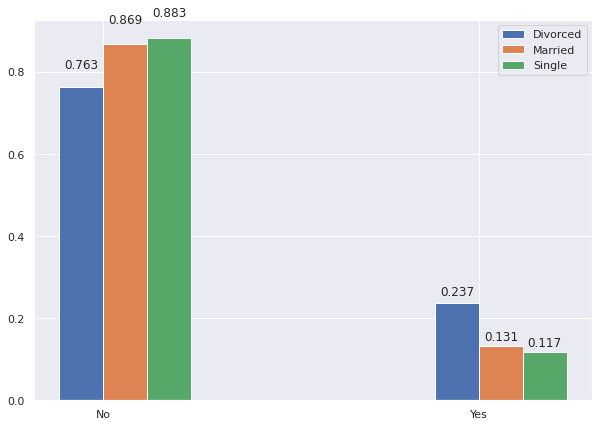

In [232]:
ind = np.array([0,3])  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
x=ind
for name in b.columns[:-1]:
  rects1 = ax.bar(x, b[name], width,label=name)
  x=x+width
  autolabel(rects1)

ax.legend()
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(b.index)
plt.show()

In [34]:
df['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

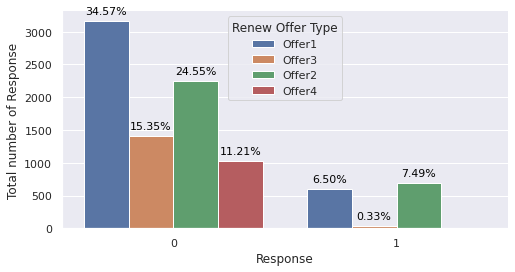

In [35]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Renew Offer Type' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

For offer1 and offer2 customers have responded to marketing calls,but for offer3 and offer4 almost nobody responded.

In [36]:
df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

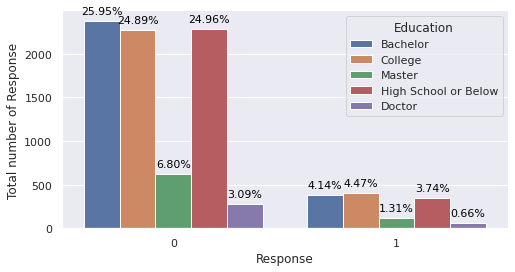

In [37]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Education' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Notice that customers with Doctor and master degree are very less who responded to marketing calls, may be they are not intersted or busy. or we can say young people are most likely to respond to marketing calls.

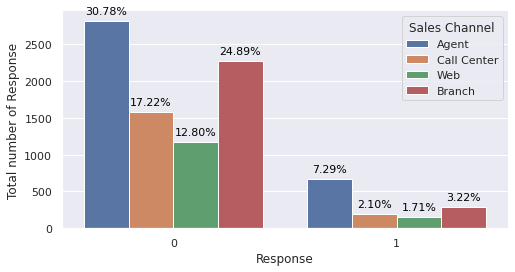

In [38]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Sales Channel' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

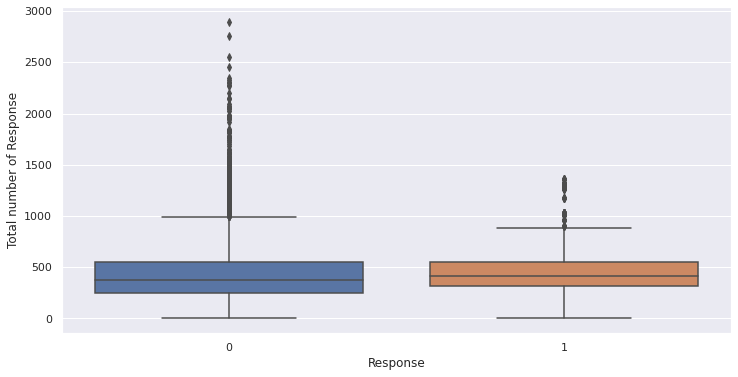

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = df)
plt.ylabel('Total number of Response')
plt.show()

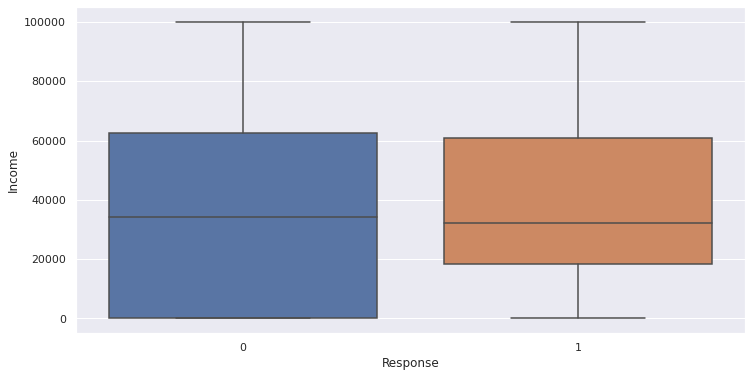

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.show()

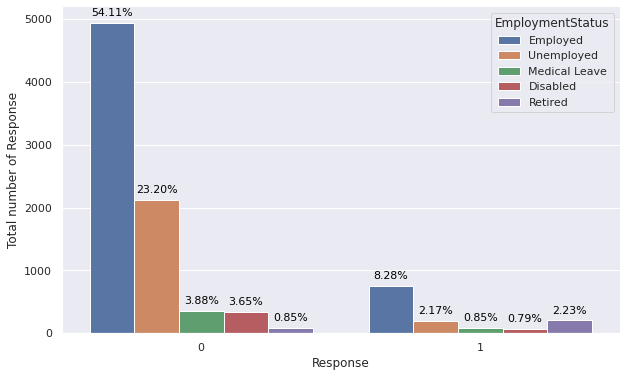

In [41]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'EmploymentStatus' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

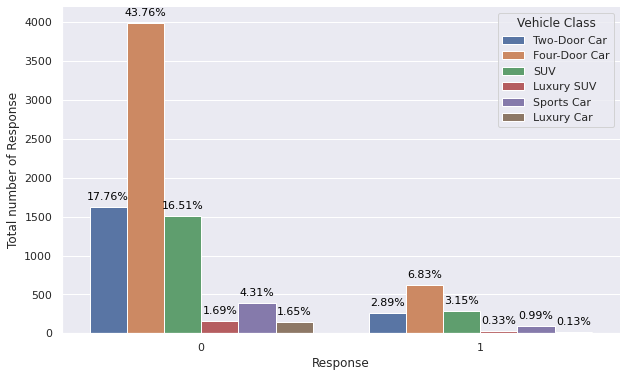

In [42]:
plt.figure(figsize=(10,6))
ax = sns.countplot('Response',hue = 'Vehicle Class' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

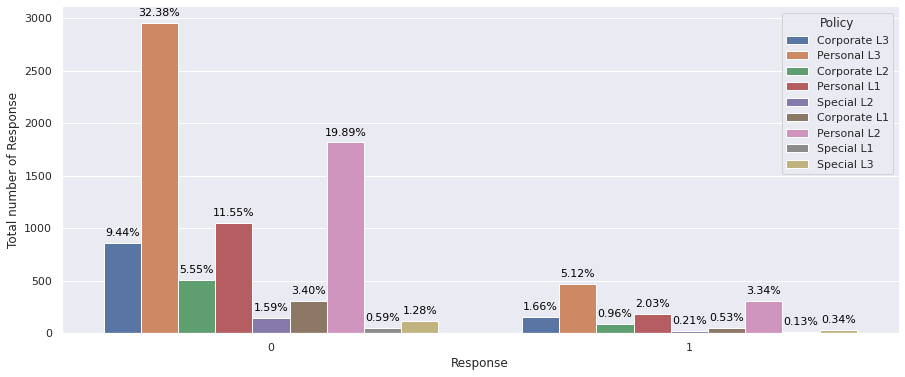

In [43]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response',hue = 'Policy' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

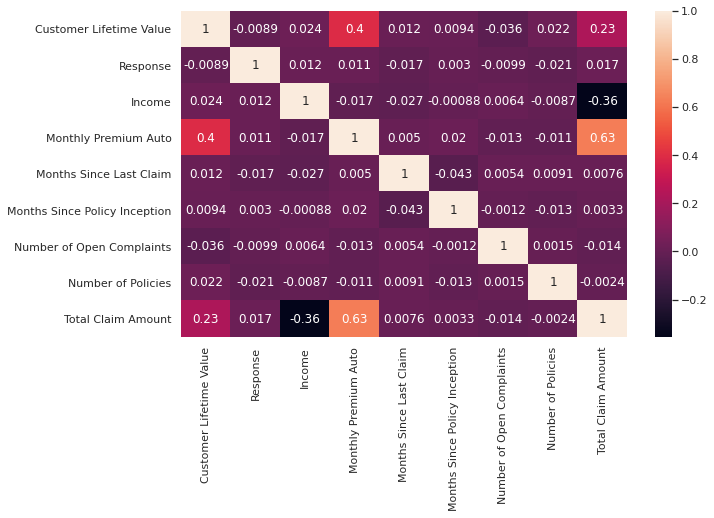

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True)
plt.show()